In [104]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import utils
from utils import *
import missingno as msno
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


In [105]:
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

In [106]:
train.head()

,id,campaign_id,coupon_id,customer_id,redemption_status,date,item_id,quantity,selling_price,other_discount,...,category,age_range,marital_status,rented,family_size,no_of_children,income_bracket,campaign_type,start_date,end_date
0,15,29,538,368,0,2013-05-30,9962,1,45.95,0.00,...,Grocery,36-45,NaN,0.0,1,NaN,5.0,Y,08/10/12,30/11/12
1,15,29,538,368,0,2013-05-30,29027,1,45.95,0.00,...,Grocery,36-45,NaN,0.0,1,NaN,5.0,Y,08/10/12,30/11/12
2,21,13,1028,89,0,2012-06-24,52056,1,71.24,-28.14,...,Grocery,46-55,NaN,0.0,1,NaN,3.0,X,19/05/13,05/07/13
3,22,9,705,712,0,2013-06-11,4904,1,113.63,-39.18,...,Grocery,46-55,Married,0.0,3,1,5.0,Y,11/03/13,12/04/13
4,22,9,705,712,0,2013-06-20,4904,1,113.63,-39.18,...,Grocery,46-55,Married,0.0,3,1,5.0,Y,11/03/13,12/04/13


In [107]:
print(train.shape)
print(test.shape)

(141060, 23)
(124628, 22)


### Drop Duplicates

In [108]:
train.drop_duplicates(subset=None, inplace=True)

In [109]:
test.drop_duplicates(subset=None, inplace=True)

In [110]:
print(train.shape)
print(test.shape)

(139850, 23)
(124227, 22)


### Feature campaign_id is LEAKED
### train from 1 to 13, also 26, 27, 28, 29 
### test from 17 to 25
### it does not exist 14, 15, 16
### Getting rid of 26 to 29 in train because they represents campaigns in test because of the sequence

In [111]:
train.campaign_id.unique()

array([29, 13,  9,  5, 10,  8, 30, 12, 11,  3, 26,  4,  6, 28,  7,  1,  2,
       27])

In [112]:
test.campaign_id.unique()

array([22, 20, 25, 18, 23, 19, 17, 21, 16, 24])

In [113]:
len(train.loc[(train['campaign_id'] == 26) | (train['campaign_id'] == 27) | (train['campaign_id'] == 28) | (train['campaign_id'] == 29)])

7699

In [114]:
indexnames = train.loc[(train['campaign_id'] == 26) | (train['campaign_id'] == 27) | (train['campaign_id'] == 28) | (train['campaign_id'] == 29)].index
train.drop(indexnames, inplace=True)

### coupon_id HAS TO BE DELETED

In [115]:
print(train.coupon_id.min())
print(train.coupon_id.max())

4
1112


In [116]:
print(test.coupon_id.min())
print(test.coupon_id.max())

28
1116


### customer_id

In [117]:
del train['customer_id']
del test['customer_id']

### item_id

In [118]:
df1 = pd.concat([train.loc[:, 'item_id'], test.loc[:, 'item_id']])


In [119]:
print(train.shape)
print(test.shape)

(132151, 22)
(124227, 21)


In [120]:
df1.shape

(256378,)

In [121]:
df1.drop_duplicates(keep=False, inplace=True)

In [122]:
df1.shape

(6068,)

In [123]:
indexnames = df1.tolist()

In [124]:
len(indexnames)

6068

In [125]:
train = train[~train['item_id'].isin(indexnames)]
test = test[~test['item_id'].isin(indexnames)]

In [126]:
print(train.shape)
print(test.shape)

(128996, 22)
(121314, 21)


### quantity skewed

In [127]:
train.loc[:, 'quantity'].describe()

count    128996.000000
mean          1.329956
std           0.875927
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          54.000000
Name: quantity, dtype: float64

In [128]:
train[(train['quantity'] > 5)]['id'].count()

972

In [129]:
train.loc[train['quantity'] > 5, 'quantity'] = 5
test.loc[test['quantity'] > 5, 'quantity'] = 5

In [130]:
train.loc[:, 'quantity'].value_counts()

1    101031
2     20973
3      3522
4      1980
5      1490
Name: quantity, dtype: int64

/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


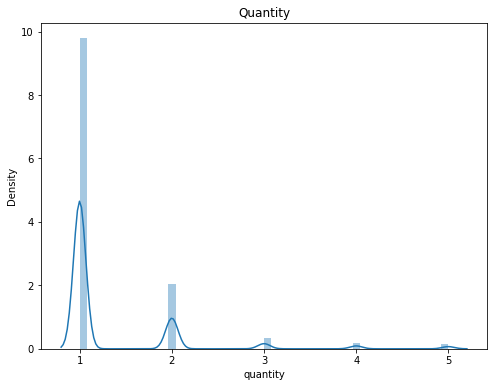

In [131]:
fig = sb.distplot(train.loc[:, 'quantity'])
plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('quantity')
plt.title('Quantity')
plt.show(fig)

### Selling_price

In [132]:
train.loc[:, 'selling_price'].describe()

count    128996.000000
mean        105.780049
std          99.622521
min           0.710000
25%          53.430000
50%          85.490000
75%         124.310000
max        3846.960000
Name: selling_price, dtype: float64

In [133]:
train[(train['selling_price'] >= 124)]['id'].count()

33558

In [134]:
rm_IQR_outliers(train, 'selling_price')
rm_IQR_outliers(test, 'selling_price')


/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


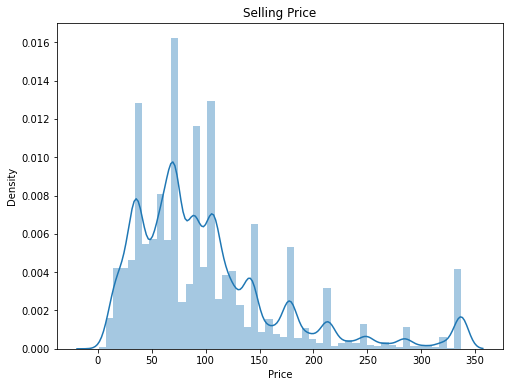

In [135]:
fig = sb.distplot(train.loc[:, 'selling_price'])
plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('Price')
plt.title('Selling Price')
plt.show(fig)

### other_discount

In [136]:
train.loc[:, 'other_discount'].describe()

count    128996.000000
mean        -21.943022
std          38.064432
min        -961.740000
25%         -31.700000
50%          -7.120000
75%           0.000000
max           0.000000
Name: other_discount, dtype: float64

/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


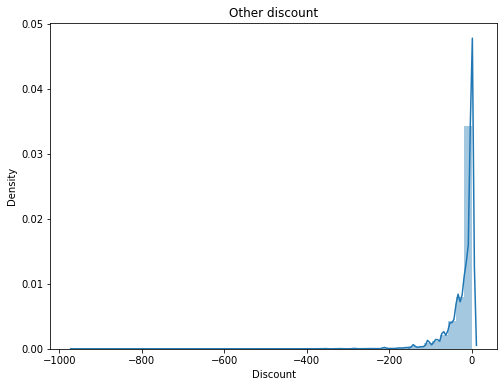

In [137]:
fig = sb.distplot(train.loc[:, 'other_discount'])
plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('Discount')
plt.title('Other discount')
plt.show(fig)

In [138]:
train.loc[train['other_discount'] > 5, 'other_discount'] = np.log(train.other_discount)


/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [139]:
train[(train['other_discount'] < -140)]['id'].count()

2298

In [140]:
train.loc[train['other_discount'] < -140, 'other_discount'] = -140
test.loc[test['other_discount'] < -140, 'other_discount'] = -140

### coupon_discount

In [141]:
train.loc[:, 'coupon_discount'].describe()

count    128996.000000
mean         -0.969541
std           6.866558
min        -534.300000
25%           0.000000
50%           0.000000
75%           0.000000
max           0.000000
Name: coupon_discount, dtype: float64

In [142]:
df = train[(train['coupon_discount'] < 0)]

In [143]:
df.loc[:, ('coupon_discount', 'redemption_status')].head()

,coupon_discount,redemption_status
19,-35.62,0
20,-35.62,0
191,-35.62,1
435,-35.62,1
578,-35.62,1


In [144]:
# Coupon discount: 97% zeroes
del train['coupon_discount']
del test['coupon_discount']

### Brand

In [145]:
train.loc[:, 'brand'].head()

2    1639
3     714
4     714
5     714
6     714
Name: brand, dtype: int64

/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


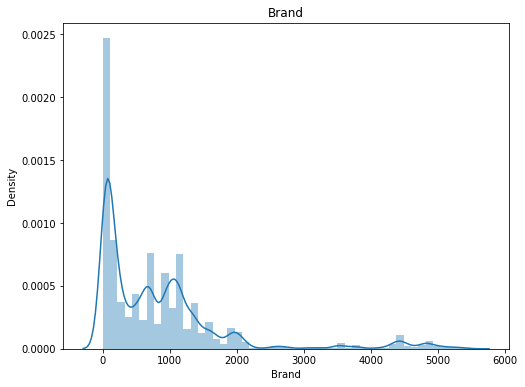

In [146]:
fig = sb.distplot(train.loc[:, 'brand'])
plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('Brand')
plt.title('Brand')
plt.show(fig)

In [147]:
train.loc[:, 'brand'].value_counts()

56      31419
714      3739
158      3719
1337     3645
278      3500
        ...  
525         1
5187        1
2565        1
168         1
2798        1
Name: brand, Length: 1061, dtype: int64

### Brand type

In [148]:
train.loc[:, 'brand_type'].value_counts()

Established    97418
Local          31578
Name: brand_type, dtype: int64

In [149]:
test.loc[:, 'brand_type'].value_counts()

Established    99792
Local          21522
Name: brand_type, dtype: int64

### Age range with missing

<AxesSubplot:>

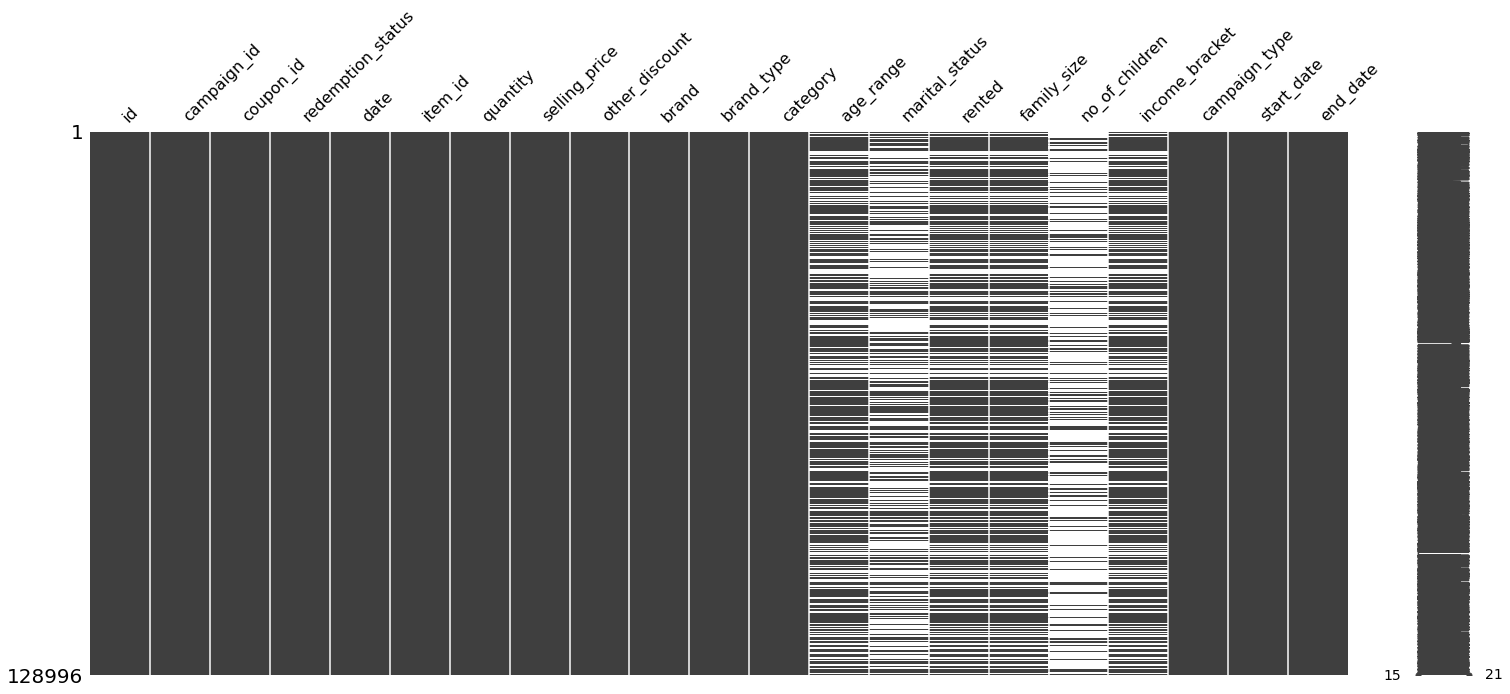

In [150]:
msno.matrix(train)

<AxesSubplot:>

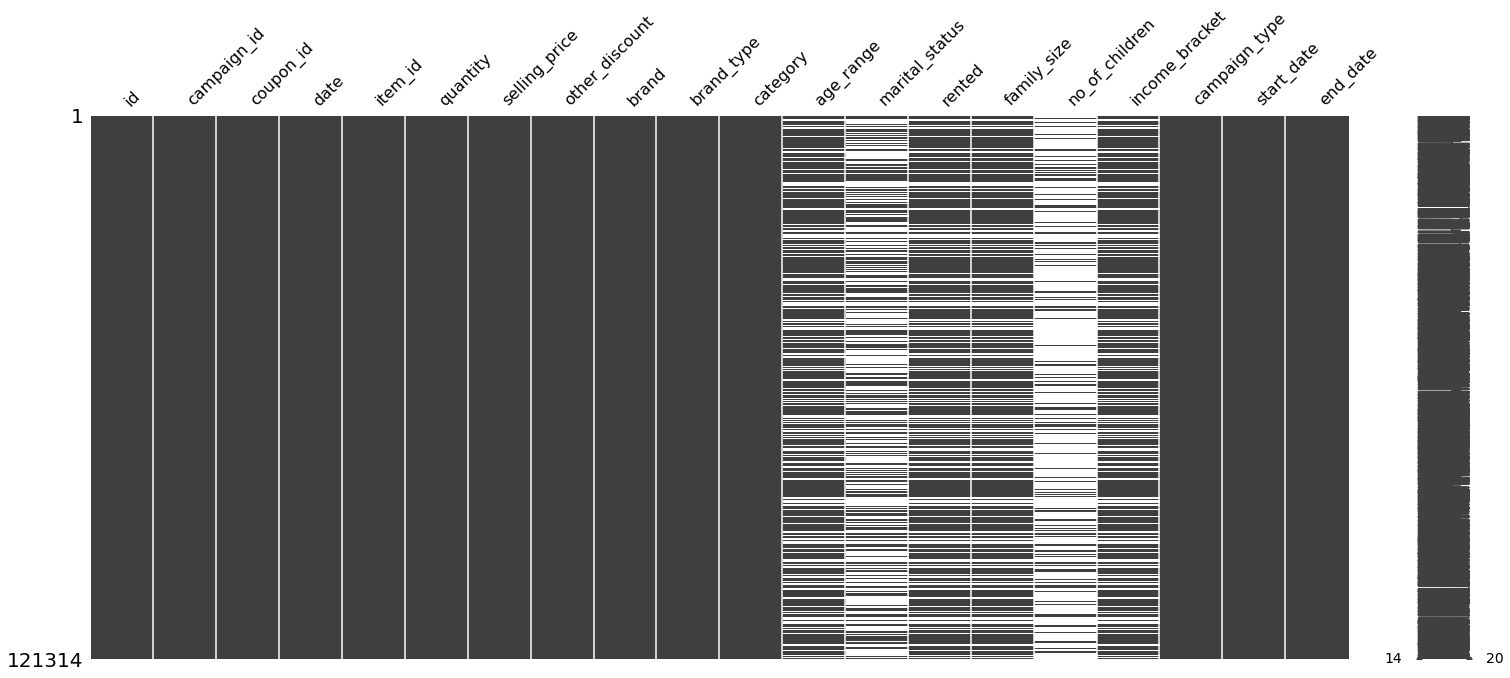

In [151]:
msno.matrix(test)

In [152]:
train.loc[:, 'age_range'].value_counts(dropna=False)

NaN      42550
46-55    27922
36-45    24624
26-35    18024
56-70     6034
70+       5481
18-25     4361
Name: age_range, dtype: int64

In [153]:
train['age_range'].fillna('46-55', inplace=True)
test['age_range'].fillna('46-55', inplace=True)

### Marital Status

In [154]:
del train['marital_status']
del test['marital_status']

### rented

In [155]:
train.loc[:, 'rented'].value_counts(dropna=False)

0.0    81619
NaN    42550
1.0     4827
Name: rented, dtype: int64

In [156]:
train['rented'].fillna(0, inplace=True)
test['rented'].fillna(0, inplace=True)


### family_size

In [157]:
train.loc[:, 'family_size'].value_counts(dropna=False)

NaN    42550
2      32588
1      24679
3      13039
4       8262
5+      7878
Name: family_size, dtype: int64

In [158]:
train['family_size'].fillna(2, inplace=True)
test['family_size'].fillna(2, inplace=True)


### no_of_children

In [159]:
del train['no_of_children']
del test['no_of_children']

### income_bracket

/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


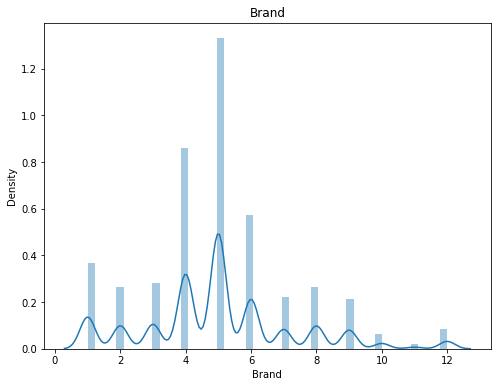

In [160]:
fig = sb.distplot(train.loc[:, 'income_bracket'])
plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('Brand')
plt.title('Brand')
plt.show(fig)

/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


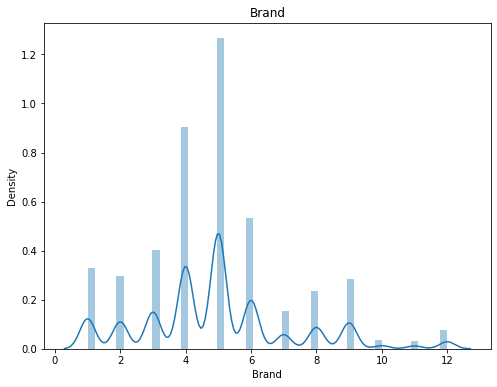

In [161]:
fig = sb.distplot(test.loc[:, 'income_bracket'])
plt.rcParams['figure.figsize']=[8,6]
plt.xlabel('Brand')
plt.title('Brand')
plt.show(fig)

In [162]:
mean_value = train['income_bracket'].mean()
train['income_bracket'] = train['income_bracket'].fillna(mean_value)
mean_value = test['income_bracket'].mean()
test['income_bracket'] = test['income_bracket'].fillna(mean_value)

### campaign_type

In [163]:
train.loc[:, 'campaign_type'].value_counts()

X    107114
Y     21882
Name: campaign_type, dtype: int64

### Convert dates

In [164]:
train['date_tr'] = pd.to_datetime(train.date, format='%Y-%m-%d')
test['date_tr'] = pd.to_datetime(test.date, format='%Y-%m-%d')

train['beginDate'] = pd.to_datetime(train.start_date, format='%d/%m/%y')
test['beginDate'] = pd.to_datetime(test.start_date, format='%d/%m/%y')

train['endDate'] = pd.to_datetime(train.end_date, format='%d/%m/%y')
test['endDate'] = pd.to_datetime(test.end_date, format='%d/%m/%y')


In [165]:
train.loc[(train.id == 22)][['endDate', 'beginDate']]

,endDate,beginDate
3,2013-04-12,2013-03-11
4,2013-04-12,2013-03-11
5,2013-04-12,2013-03-11


In [166]:
train['daysCampaign'] = (train.loc[:, 'endDate'] - train.loc[:, 'beginDate']).dt.days
test['daysCampaign'] = (test.loc[:, 'endDate'] - test.loc[:, 'beginDate']).dt.days

In [167]:
test.loc[(test.id == 3)][['endDate', 'beginDate']]

,endDate,beginDate
0,2013-10-18,2013-09-16
1,2013-10-18,2013-09-16
2,2013-10-18,2013-09-16
3,2013-10-18,2013-09-16
4,2013-10-18,2013-09-16
5,2013-10-18,2013-09-16
6,2013-10-18,2013-09-16
7,2013-10-18,2013-09-16
8,2013-10-18,2013-09-16
9,2013-10-18,2013-09-16


In [168]:
train['daysCampaign'] = (train.loc[:, 'endDate'] - train.loc[:, 'beginDate']).dt.days
test['daysCampaign'] = (test.loc[:, 'endDate'] - test.loc[:, 'beginDate']).dt.days

### campaign_id correlated to start_date and end_date, both deleted campaign_id preferred

In [169]:
del train['start_date']
del train['end_date']
del test['start_date']
del test['end_date']

### Date processing

In [170]:
train['month'] = pd.DatetimeIndex(train['date']).month
train['day'] = pd.DatetimeIndex(train['date']).day

test['month'] = pd.DatetimeIndex(test['date']).month
test['day'] = pd.DatetimeIndex(test['date']).day

del train['date']
del train['beginDate']
del train['endDate']
del train['date_tr']

del test['date']
del test['beginDate']
del test['endDate']
del test['date_tr']


In [171]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128996 entries, 2 to 141059
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 128996 non-null  int64  
 1   campaign_id        128996 non-null  int64  
 2   coupon_id          128996 non-null  int64  
 3   redemption_status  128996 non-null  int64  
 4   item_id            128996 non-null  int64  
 5   quantity           128996 non-null  int64  
 6   selling_price      128996 non-null  float64
 7   other_discount     128996 non-null  float64
 8   brand              128996 non-null  int64  
 9   brand_type         128996 non-null  object 
 10  category           128996 non-null  object 
 11  age_range          128996 non-null  object 
 12  rented             128996 non-null  float64
 13  family_size        128996 non-null  object 
 14  income_bracket     128996 non-null  float64
 15  campaign_type      128996 non-null  object 
 16  da

### Because of the correlation matrix, the following features are removed

In [172]:
del train['coupon_id']
del train['age_range']
del train['family_size']

del test['coupon_id']
del test['age_range']
del test['family_size']

In [173]:
print(train.shape)
print(test.shape)

(128996, 16)
(121314, 15)


In [174]:
train.head()

,id,campaign_id,redemption_status,item_id,quantity,selling_price,other_discount,brand,brand_type,category,rented,income_bracket,campaign_type,daysCampaign,month,day
2,21,13,0,52056,1,71.24,-28.14,1639,Established,Grocery,0.0,3.0,X,47,6,24
3,22,9,0,4904,1,113.63,-39.18,714,Established,Grocery,0.0,5.0,Y,32,6,11
4,22,9,0,4904,1,113.63,-39.18,714,Established,Grocery,0.0,5.0,Y,32,6,20
5,22,9,0,30345,2,178.10,-54.85,714,Established,Grocery,0.0,5.0,Y,32,3,10
6,19636,13,0,4904,1,113.63,-39.18,714,Established,Grocery,0.0,5.0,X,47,6,11


### Some final processing

In [175]:
del train['id']
del test['id']

In [176]:
train['price'] = train.loc[:, 'selling_price'] + train.loc[:, 'other_discount']
test['price'] = test.loc[:, 'selling_price'] + test.loc[:, 'other_discount']

In [177]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128996 entries, 2 to 141059
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   campaign_id        128996 non-null  int64  
 1   redemption_status  128996 non-null  int64  
 2   item_id            128996 non-null  int64  
 3   quantity           128996 non-null  int64  
 4   selling_price      128996 non-null  float64
 5   other_discount     128996 non-null  float64
 6   brand              128996 non-null  int64  
 7   brand_type         128996 non-null  object 
 8   category           128996 non-null  object 
 9   rented             128996 non-null  float64
 10  income_bracket     128996 non-null  float64
 11  campaign_type      128996 non-null  object 
 12  daysCampaign       128996 non-null  int64  
 13  month              128996 non-null  int64  
 14  day                128996 non-null  int64  
 15  price              128996 non-null  float64
dtypes:

### Standardize

In [178]:
scaler = preprocessing.StandardScaler()

names = ['campaign_id', 'item_id', 'selling_price', 'other_discount', 'price', 'brand', 'income_bracket', 'daysCampaign', 'month', 'day']
scaled_train = scaler.fit_transform(train[names])
scaled_train = pd.DataFrame(scaled_train, columns=names)

names = ['campaign_id', 'item_id', 'selling_price', 'other_discount', 'price', 'brand', 'income_bracket', 'daysCampaign', 'month', 'day']
scaled_test = scaler.fit_transform(test[names])
scaled_test = pd.DataFrame(scaled_test, columns=names)

### One_hot encoding

In [179]:
train.loc[:, 'category'].value_counts()

Grocery                   85654
Pharmaceutical            15701
Packaged Meat             12290
Natural Products           7435
Meat                       3829
Dairy, Juices & Snacks     1682
Seafood                    1566
Skin & Hair Care            263
Prepared Food               198
Flowers & Plants            125
Garden                       75
Miscellaneous                47
Bakery                       46
Salads                       42
Travel                       38
Vegetables (cut)              5
Name: category, dtype: int64

In [180]:
train['category'] = train['category'].str.replace(' \(cut\)', '')
train['category'] = train['category'].str.replace(' & ', '_')
train['category'] = train['category'].str.replace(' ', '_')
train['category'] = train['category'].str.replace(',_', '_')

test['category'] = test['category'].str.replace(' \(cut\)', '')
test['category'] = test['category'].str.replace(' & ', '_')
test['category'] = test['category'].str.replace(' ', '_')
test['category'] = test['category'].str.replace(',_', '_')


/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  """Entry point for launching an IPython kernel.
/Users/ofigue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [181]:
train.loc[:, 'category'].value_counts()

Grocery                85654
Pharmaceutical         15701
Packaged_Meat          12290
Natural_Products        7435
Meat                    3829
Dairy_Juices_Snacks     1682
Seafood                 1566
Skin_Hair_Care           263
Prepared_Food            198
Flowers_Plants           125
Garden                    75
Miscellaneous             47
Bakery                    46
Salads                    42
Travel                    38
Vegetables                 5
Name: category, dtype: int64

In [182]:
train_ohe = train.loc[:, ['brand_type', 'category', 'campaign_type']]
test_ohe = test.loc[:, ['brand_type', 'category', 'campaign_type']]
cat_columns = ['brand_type', 'category', 'campaign_type']

encoded_train = pd.get_dummies(train_ohe, prefix_sep="_", columns=cat_columns, drop_first=True).reset_index()
encoded_test = pd.get_dummies(test_ohe, prefix_sep="_", columns=cat_columns, drop_first=True).reset_index()

In [183]:
scaled_test.shape

(121314, 10)

In [184]:
encoded_test.head()

,index,brand_type_Local,category_Dairy_Juices_Snacks,category_Flowers_Plants,category_Garden,category_Grocery,category_Meat,category_Miscellaneous,category_Natural_Products,category_Packaged_Meat,category_Pharmaceutical,category_Prepared_Food,category_Salads,category_Seafood,category_Skin_Hair_Care,category_Travel,category_Vegetables,campaign_type_Y
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [185]:
del encoded_train['index']
del encoded_test['index']

In [186]:
encoded_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121314 entries, 0 to 121313
Data columns (total 17 columns):
 #   Column                        Non-Null Count   Dtype
---  ------                        --------------   -----
 0   brand_type_Local              121314 non-null  uint8
 1   category_Dairy_Juices_Snacks  121314 non-null  uint8
 2   category_Flowers_Plants       121314 non-null  uint8
 3   category_Garden               121314 non-null  uint8
 4   category_Grocery              121314 non-null  uint8
 5   category_Meat                 121314 non-null  uint8
 6   category_Miscellaneous        121314 non-null  uint8
 7   category_Natural_Products     121314 non-null  uint8
 8   category_Packaged_Meat        121314 non-null  uint8
 9   category_Pharmaceutical       121314 non-null  uint8
 10  category_Prepared_Food        121314 non-null  uint8
 11  category_Salads               121314 non-null  uint8
 12  category_Seafood              121314 non-null  uint8
 13  category_Skin_

In [187]:
df_train = pd.concat([scaled_train, encoded_train], axis=1)
df_test = pd.concat([scaled_test, encoded_test], axis=1)

In [188]:
print(scaled_train.shape)
print(encoded_train.shape)

(128996, 10)
(128996, 17)


In [189]:
df_test.shape

(121314, 27)

In [190]:
df = train.loc[:, 'redemption_status'].reset_index()

In [191]:
del df['index']

In [192]:
df_train = pd.concat([df_train, df], axis=1)


In [193]:
print(df_train.shape)
print(df_test.shape)

(128996, 28)
(121314, 27)


In [194]:
df_train.rename(columns={'redemption_status':'target'}, inplace=True)

In [195]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128996 entries, 0 to 128995
Data columns (total 28 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   campaign_id                   128996 non-null  float64
 1   item_id                       128996 non-null  float64
 2   selling_price                 128996 non-null  float64
 3   other_discount                128996 non-null  float64
 4   price                         128996 non-null  float64
 5   brand                         128996 non-null  float64
 6   income_bracket                128996 non-null  float64
 7   daysCampaign                  128996 non-null  float64
 8   month                         128996 non-null  float64
 9   day                           128996 non-null  float64
 10  brand_type_Local              128996 non-null  uint8  
 11  category_Dairy_Juices_Snacks  128996 non-null  uint8  
 12  category_Flowers_Plants       128996 non-nul

In [196]:
df_train.insert(0, 'id', range(1, 1 + len(df_train)))
df_test.insert(0, 'id', range(1, 1 + len(df_test)))

In [197]:
df_train.head()

,id,campaign_id,item_id,selling_price,other_discount,price,brand,income_bracket,daysCampaign,month,...,category_Packaged_Meat,category_Pharmaceutical,category_Prepared_Food,category_Salads,category_Seafood,category_Skin_Hair_Care,category_Travel,category_Vegetables,campaign_type_Y,target
0,1,0.483365,1.326861,-0.416052,-0.241558,-0.542712,0.782110,-1.065355,0.363159,-0.035578,...,0,0,0,0,0,0,0,0,0,0
1,2,-0.523252,-1.352607,0.182784,-0.604456,-0.080372,-0.124572,-0.000129,-2.396170,-0.035578,...,0,0,0,0,0,0,0,0,1,0
2,3,-0.523252,-1.352607,0.182784,-0.604456,-0.080372,-0.124572,-0.000129,-2.396170,-0.035578,...,0,0,0,0,0,0,0,0,1,0
3,4,-0.523252,0.093108,1.093541,-1.119549,0.639315,-0.124572,-0.000129,-2.396170,-0.952002,...,0,0,0,0,0,0,0,0,1,0
4,5,0.483365,-1.352607,0.182784,-0.604456,-0.080372,-0.124572,-0.000129,0.363159,-0.035578,...,0,0,0,0,0,0,0,0,0,0


In [198]:
df_train.to_csv('../input/trainset.csv', index = False)
df_test.to_csv('../input/testset.csv', index = False)